In [20]:
from fastbook import *
from fastai.vision.widgets import *
from IPython.display import display

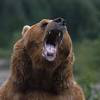

In [7]:
im = Image.open('bear/grizzly/image_3.jpg')
im.to_thumb(128,128)

In [11]:
bear_types = 'grizzly','black','teddy'
path = Path('bear')
fns = get_image_files(path)
fns

(#779) [Path('bear/grizzly/image_193.jpg'),Path('bear/grizzly/image_187.jpg'),Path('bear/grizzly/image_178.jpg'),Path('bear/grizzly/image_150.jpg'),Path('bear/grizzly/image_144.jpg'),Path('bear/grizzly/image_15.jpg'),Path('bear/grizzly/image_29.jpg'),Path('bear/grizzly/image_226.jpg'),Path('bear/grizzly/image_232.jpg'),Path('bear/grizzly/image_233.jpg')...]

In [12]:
### CHECK FOR CORRUPTED IMAGES
failed = verify_images(fns)
failed

(#0) []

In [14]:
### REMOVES ALL FAILED IMAGES
failed.map(Path.unlink);

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export_bears.pkl')]

In [16]:
learn_inf = load_learner(path/'export_bears.pkl')

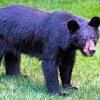

('black', tensor(0), tensor([9.9906e-01, 8.3547e-04, 1.0743e-04]))

In [36]:
img_str = 'bear/black/image_6.jpg'
display((Image.open(img_str)).to_thumb(128, 128))
learn_inf.predict(img_str)
### RETURNS
### predicted_category
### index of predicted_category
### array of probabilities corresponding to each

In [34]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [48]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])